In [ ]:
!pip install tensorflow==2.0.0
!pip install tensorflow-gpu==2.0.0
!pip install h5py==2.10.0

     |████████████████████████████████| 86.3MB 34kB/s 
     |████████████████████████████████| 450kB 42.4MB/s 
     |████████████████████████████████| 3.8MB 50.2MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp37-none-any.whl size=7557 sha256=e6b8c88e2caf5b27ac06cecc98eceb493ffe710f773246802d190a63aa56d148
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow-estimator-2.5.0
  Found existing installation: tensorboard 2.5.0
    Uninstalling tensorboard-2.5.0:
      Successfully uninstalled tensorboard-2.5.0
  Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Successfully u

In [ ]:
!nvidia-smi

Thu Jun 10 02:52:04 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   49C    P8    10W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 4.8MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=e113bf39f4fb5648787e709573f673f60e07295d8227f882bf00b2d3f96dc1ec
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!mkdir kaggle

In [ ]:
import json
token = {"username":"prabhatale","key":"a31d87fa6250cb5f600f43826e899ba5"}
with open('/content/kaggle/kaggle.json', 'w') as file:
    json.dump(token, file)

In [ ]:
!cp /content/kaggle/kaggle.json ~/.kaggle/kaggle.json

In [ ]:
!kaggle config set -n path -v{/content}

- path is now set to: {/content}


In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d timhuijsmans/wildlife-citizen-science-app -p /content

100% 7.36G/7.36G [02:47<00:00, 39.2MB/s]
100% 7.36G/7.36G [02:47<00:00, 47.2MB/s]


In [ ]:
import zipfile
archive = zipfile.ZipFile('/content/wildlife-citizen-science-app.zip')
archive.extractall('/content')

In [ ]:
import os
import shutil 
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
!rm -rf "/content/Train XL"
!rm -rf "/content/Test"
!rm -rf "/content/Val"
!rm -rf "/content/wildlife-citizen-science-app.zip"

In [ ]:
dataset = '/content/wildlife_citizen_science_app_datasets'
train_dir = '/content/wildlife_citizen_science_app_datasets/train'
test_dir = '/content/wildlife_citizen_science_app_datasets/test'
valid_dir = '/content/wildlife_citizen_science_app_datasets/valid'

In [ ]:
categories = ['Animals','No_Animals']

**<h2>Exploring Datasets</h2>**

In [ ]:
for split in os.listdir(dataset):
  path_to_split_type = os.path.join(dataset,split)
  for category in os.listdir(path_to_split_type):
    path_to_category = os.path.join(path_to_split_type,category)
    print("There are {} {} image belonging to {} class.".format(len(os.listdir(path_to_category)),split,category))

There are 12377 train image belonging to Animals class.
There are 12329 train image belonging to No_Animals class.
There are 3022 valid image belonging to Animals class.
There are 2893 valid image belonging to No_Animals class.


**<h1>Datasets Visualization </h1>**

In [ ]:
def get_images(data_dir,number_of_samples):
  image_path = []
  for category in categories:
    path = os.path.join(data_dir,category)
    i = 1
    for img in os.listdir(path):
      if i > number_of_samples:
        break
      else:
        image_path.append(os.path.join(path,img))
        i += 1
  return image_path

In [ ]:
def visualize_dataset(image_path,rows,cols):
  fig = plt.figure(figsize=(20,20))
  for i in range(1,rows * cols + 1):
    fig.add_subplot(rows,cols,i)
    img_array = cv2.imread(image_path[i-1])
    fig.subplots_adjust(hspace=1)
    plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
    plt.xlabel(image_path[i-1].split('/')[-2])
  plt.show()

In [ ]:
training_image_path = get_images(data_dir= train_dir,number_of_samples=25)
print(training_image_path)
print(len(training_image_path))

['/content/wildlife_citizen_science_app_datasets/train/Animals/train_Animals_Night_video13_84.jpg', '/content/wildlife_citizen_science_app_datasets/train/Animals/first_folder385PTDC0012hr_flipaugmentations_0_9976.jpg', '/content/wildlife_citizen_science_app_datasets/train/Animals/first_folder26PTDC0257augmentations_0_3986.jpg', '/content/wildlife_citizen_science_app_datasets/train/Animals/train_Animals_Night_video12_15.jpg', '/content/wildlife_citizen_science_app_datasets/train/Animals/test_Animals_Night_video2_128.jpg', '/content/wildlife_citizen_science_app_datasets/train/Animals/train_Animals_Day_video8_356.jpg', '/content/wildlife_citizen_science_app_datasets/train/Animals/train_Animals_Day_video2_91.jpg', '/content/wildlife_citizen_science_app_datasets/train/Animals/train_Animals_Night_video14_50.jpg', '/content/wildlife_citizen_science_app_datasets/train/Animals/train_Animals_Night_video10_44.jpg', '/content/wildlife_citizen_science_app_datasets/train/Animals/test_Animals_Night_v

**<h2>Training Dataset Visualization </h2>**

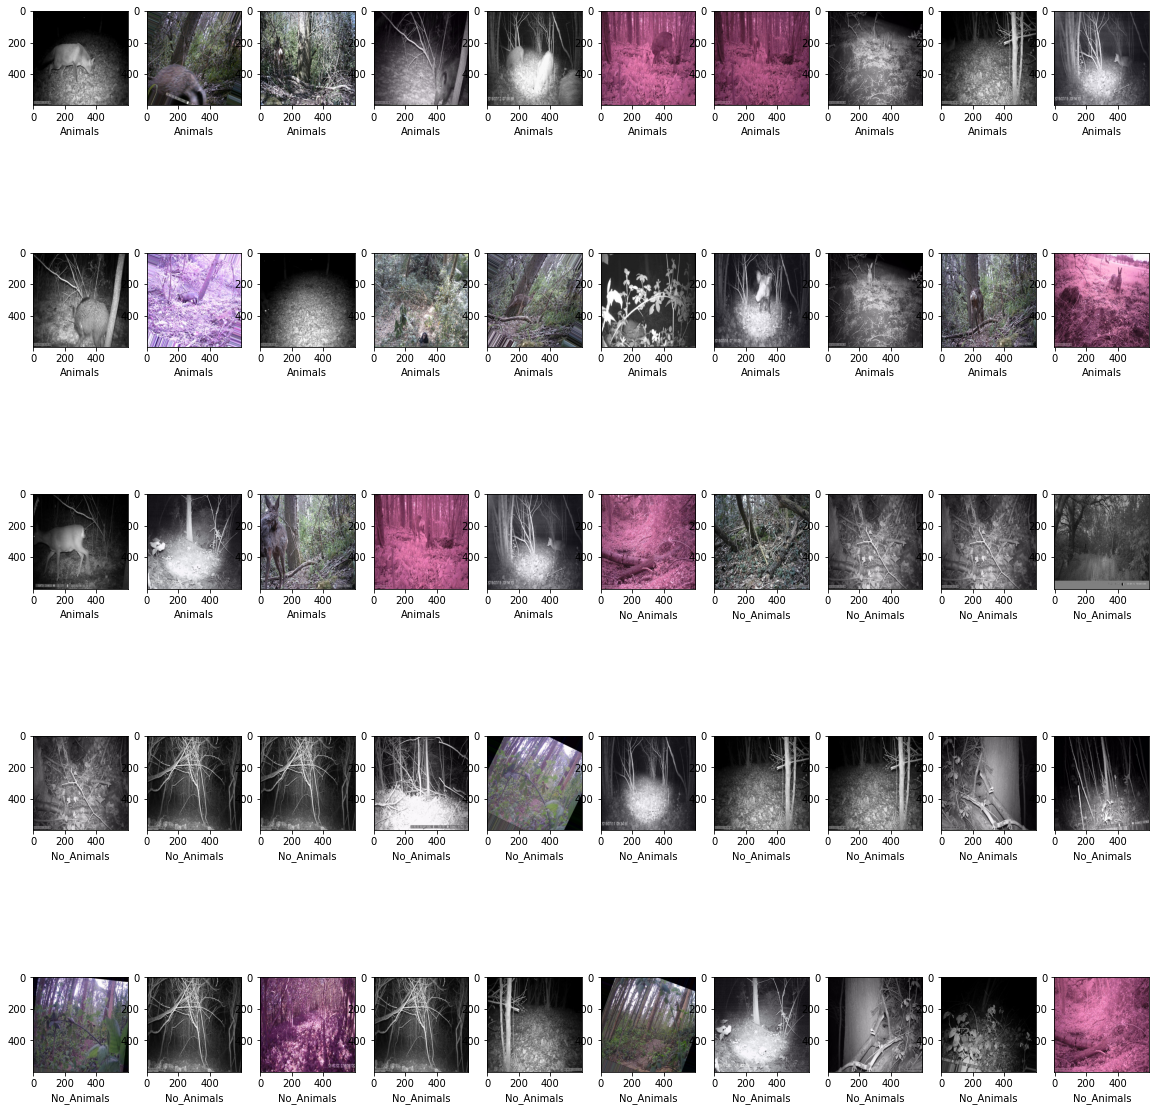

In [ ]:
visualize_dataset(image_path=training_image_path,rows=5,cols=10)

**<h2>Validation Datasets Visualization</h2>**

In [ ]:
validation_image_path = get_images(data_dir= valid_dir,number_of_samples=25)
print(validation_image_path)
print(len(validation_image_path))

['/content/wildlife_citizen_science_app_datasets/valid/Animals/first_folder389PICT0176hr_flipaugmentations_0_9622.jpg', '/content/wildlife_citizen_science_app_datasets/valid/Animals/valid_Animals_Day_video2_417.jpg', '/content/wildlife_citizen_science_app_datasets/valid/Animals/valid_Animals_Day_video1_39.jpg', '/content/wildlife_citizen_science_app_datasets/valid/Animals/first_folder288PICT0266augmentations_0_4688.jpg', '/content/wildlife_citizen_science_app_datasets/valid/Animals/valid_Animals_Day_video3_39.jpg', '/content/wildlife_citizen_science_app_datasets/valid/Animals/valid_Animals_Night_video3_96.jpg', '/content/wildlife_citizen_science_app_datasets/valid/Animals/fifth_folder45PTDC0103augmentations_0_2941.jpg', '/content/wildlife_citizen_science_app_datasets/valid/Animals/first_folder22PTDC0178hr_flipaugmentations_0_9397.jpg', '/content/wildlife_citizen_science_app_datasets/valid/Animals/valid_Animals_Day_video2_440.jpg', '/content/wildlife_citizen_science_app_datasets/valid/A

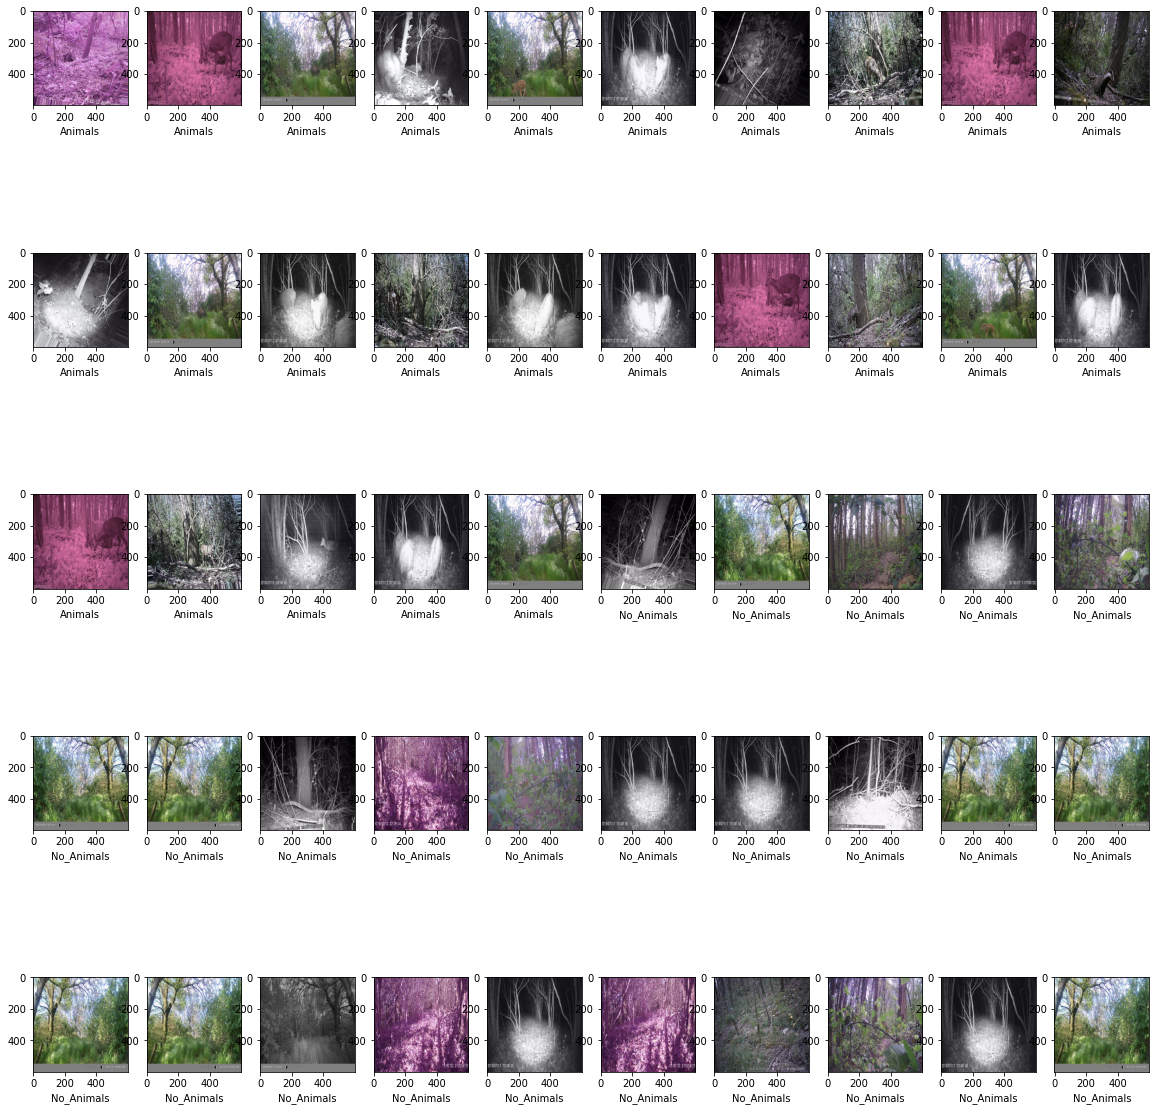

In [ ]:
visualize_dataset(image_path=validation_image_path,rows=5,cols=10)

<h1>Model Building & Preparation</h1>

In [ ]:
from tensorflow.keras.layers import Dense,Dropout,Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.applications import Xception
from tensorflow.keras.models import model_from_json
import json
from tensorflow.keras.preprocessing import image
import numpy as np

In [ ]:
train_datagen = ImageDataGenerator(horizontal_flip=True,brightness_range=(0.8,1.2),rotation_range=30,width_shift_range=0.2,height_shift_range=0.25,shear_range=0.25,zoom_range=0.5,rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(300,300),color_mode='rgb',
                                                    class_mode='binary',batch_size=25,shuffle=True)

Found 24706 images belonging to 2 classes.


In [ ]:
valid_generator = valid_datagen.flow_from_directory(valid_dir,target_size=(300,300),color_mode='rgb',
                                                    class_mode='binary',batch_size=25)

Found 5915 images belonging to 2 classes.


In [ ]:
xception = Xception(weights="imagenet",include_top=False,input_shape=(300,300,3))

83689472/83683744 [==============================] - 1s 0us/step


In [ ]:
xception.trainable = False

In [ ]:
# Let's take a look to see how many layers are in the base model
print("Number of layers in the base model: ", len(xception.layers))

# # Fine-tune from this layer onwards
# fine_tune_at = 151

# # Freeze all the layers before the `fine_tune_at` layer
# for layer in mobilenet.layers[:fine_tune_at]:
#   layer.trainable =  False

Number of layers in the base model:  132


In [ ]:
output = Flatten()(xception.output)
output = Dropout(0.4)(output)
output = Dense(units = 8,activation='relu')(output)
prediction = Dense(1,activation='sigmoid')(output)

In [ ]:
model = Model(inputs = xception.input,outputs = prediction)
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

**<h2>For training the network where you left off</h2>**

**<h4>Note:It is to be used if you have pretrained weights saved earlier and wanted to train network more for more accuracy. Here it is used to refer to the commented codes below</h4>**

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# !cp -r "/content/gdrive/MyDrive/animal_classification_ngo_datasets/animal_classifier_xceptionnet_21-0.900339.h5" "/content"
# !cp -r "/content/gdrive/MyDrive/animal_classification_ngo_datasets/animal_classifier_xceptionnet.json" "/content"

In [ ]:
# # load json and create model
# json_file = open('animal_classifier_xceptionnet.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# model = model_from_json(loaded_model_json)
# # load weights into new model
# model.load_weights("model_weights/animal_classifier_xceptionnet_05-0.925932.h5")
# print("Loaded model from disk")

Loaded model from disk


In [ ]:
# model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 300, 300, 3) 0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 149, 149, 32) 128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 149, 149, 32) 0           block1_conv1_bn[0][0]            
______________________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='binary_crossentropy',
  optimizer=Adam(
    learning_rate=0.000001,
    beta_1=0.9,
    beta_2=0.999,
    epsilon=1e-07
),
  metrics=['accuracy']
)

In [ ]:
import os
os.mkdir('/content/model_weights/')

In [ ]:
model_checkpoint = ModelCheckpoint('./model_weights/animal_classifier_xceptionnet_{epoch:02d}-{val_accuracy:.6f}.h5', monitor='val_loss', mode='min', verbose=1, save_best_only=True,save_weights_only=True)

**<h2>Change the number of epochs to 25</h2>** 

**<h4>Note: To train the model for 25 epochs on high end gpu (google colab), it requires 6 to 8 hours so we have to train it wisely for getting the end results as we have got.</h4>**

In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // 25,
    validation_data = valid_generator, 
    validation_steps = valid_generator.samples // 25,
    epochs = 5,
    callbacks=[model_checkpoint])

Epoch 1/5
987/988 [============================>.] - ETA: 0s - loss: 0.1861 - accuracy: 0.9268
Epoch 00001: val_loss improved from 0.26827 to 0.26670, saving model to ./model_weights/animal_classifier_xceptionnet_01-0.919322.h5
988/988 [==============================] - 1049s 1s/step - loss: 0.1860 - accuracy: 0.9268 - val_loss: 0.2667 - val_accuracy: 0.9193
Epoch 2/5
987/988 [============================>.] - ETA: 0s - loss: 0.1807 - accuracy: 0.9296
Epoch 00002: val_loss did not improve from 0.26670
988/988 [==============================] - 1049s 1s/step - loss: 0.1811 - accuracy: 0.9295 - val_loss: 0.2754 - val_accuracy: 0.9061
Epoch 3/5
987/988 [============================>.] - ETA: 0s - loss: 0.1833 - accuracy: 0.9287
Epoch 00003: val_loss improved from 0.26670 to 0.26541, saving model to ./model_weights/animal_classifier_xceptionnet_03-0.916102.h5
988/988 [==============================] - 1052s 1s/step - loss: 0.1833 - accuracy: 0.9288 - val_loss: 0.2654 - val_accuracy: 0.9161

In [ ]:
# serialize model to JSON
model_json = model.to_json()
with open("animal_classifier_xceptionnet.json", "w") as json_file:
    json_file.write(model_json)

In [ ]:
!cp -r "/content/model_weights/animal_classifier_xceptionnet_18-0.918305.h5" "/content/gdrive/MyDrive/animal_classification_ngo_datasets"

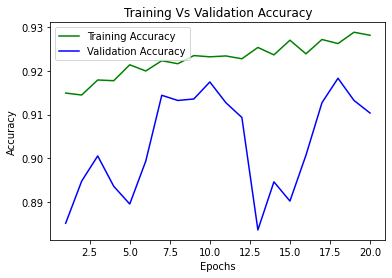

In [ ]:
import matplotlib.pyplot as plt
train_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
epochs = range(1,21)
plt.plot(epochs,train_accuracy,'g',label='Training Accuracy')
plt.plot(epochs,validation_accuracy,'b',label='Validation Accuracy')
plt.title('Training Vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
    

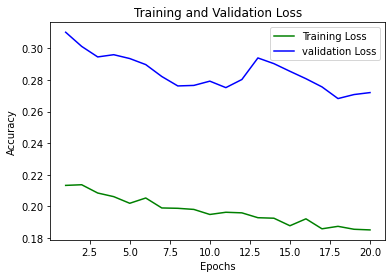

In [ ]:
import matplotlib.pyplot as plt
train_loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,21)
plt.plot(epochs,train_loss,'g', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
def check_predictions(dataset_dir):
  y_true = []
  y_pred = []
  images_path = [] 
  for category_type in os.listdir(dataset_dir):
    print(category_type)
    path_to_category_type = os.path.join(dataset_dir,category_type)
    for img in os.listdir(path_to_category_type):
      img_arr = image.load_img(os.path.join(path_to_category_type,img),target_size=(300,300))
      img_arr = image.img_to_array(img_arr)
      img_arr = np.expand_dims(img_arr,axis=0)
      img_arr = img_arr / 255.0
      prediction = model.predict(img_arr)
      if prediction > 0.5:
        prediction_class = 1
        real_class = categories.index(category_type)
        y_true.append(real_class)
        y_pred.append(prediction_class)
        images_path.append(os.path.join(path_to_category_type,img))
      else:
        prediction_class = 0
        real_class = categories.index(category_type)
        y_true.append(real_class)
        y_pred.append(prediction_class)
        images_path.append(os.path.join(path_to_category_type,img))
  return [y_true,y_pred,images_path]

In [ ]:
[y_true,y_pred,images_path] = check_predictions(valid_dir)
print(len(y_true))
print(len(y_pred))
print(len(images_path))

Animals
No_Animals
5915
5915
5915


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#Confution Matrix and Classification Report
print('Confusion Matrix')
print(confusion_matrix(y_true, y_pred))
print('Classification Report')
print(classification_report(y_true, y_pred, target_names=categories))

Confusion Matrix
[[2746  276]
 [ 161 2732]]
Classification Report
              precision    recall  f1-score   support

     Animals       0.94      0.91      0.93      3022
  No_Animals       0.91      0.94      0.93      2893

    accuracy                           0.93      5915
   macro avg       0.93      0.93      0.93      5915
weighted avg       0.93      0.93      0.93      5915



In [ ]:
# indices = [i for i,v in enumerate(pred) if pred[i]!=y_test[i]]
# subset_of_wrongly_predicted = [x_test[i] for i in indices ]